# Dilated Causal CNN Model Implementation

there arem any core functions that are used which are predefined in various efficient libraries. hence this is to make sure that the most commonlyused ones are present

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(False)
# plt.grid(None)
from sklearn.preprocessing import MinMaxScaler 

In most cases it's important to aave the intermeditary files and state drives, google drives proves to ne a valuable resursce in this aspect, these lines are to incorporate the files and drives as whole for unrestricted access

In [ ]:
# optional -- to read directly from drive
# for local load -- do directly pd.read_pickle with the respective path
from google.colab import drive
drive.mount("/content/gdrive")

In [3]:
# !ls {"/home/o/Documents"} # for the dl1
#!ls {"/Users/oggy/Documents/dl101"} # for the MacBook Pro

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/solar_irradiation_data.csv")# add the correct path details in oreder to make it work properly\
df

,Time,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
0,2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
1,2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2,2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
3,2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
4,2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0
...,...,...,...,...,...,...,...,...,...
27809,2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0
27810,2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0
27811,2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0
27812,2022-09-01 20:00:00,ACST,0.000000,0.000000,129.577778,0.919404,11.599545,99.721071,9648.0


In [5]:
df.head()

,Time,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
0,2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
1,2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2,2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
3,2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
4,2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0


<Axes: >

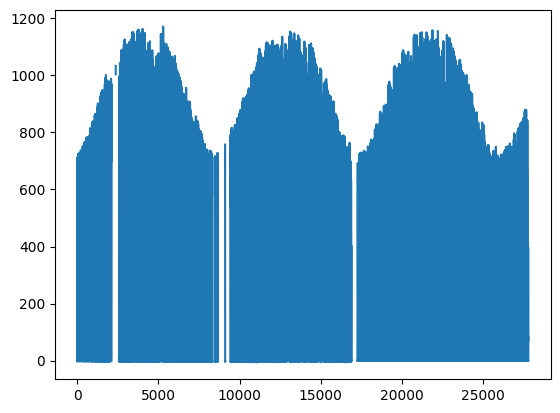

In [6]:
# test2["Sofia"]["Temp, C"]['2014-01':'2014-12'].plot()
df['GHI_AVG'].plot()

<ipython-input-10-b668b700ffaa>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

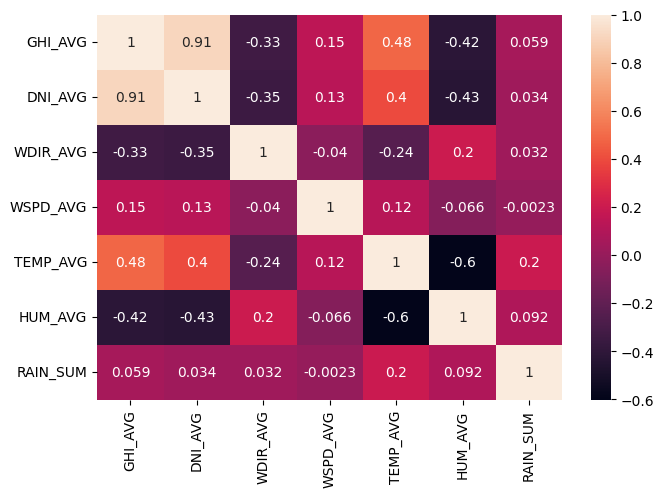

In [10]:
# Correlation heatmap matirx
import seaborn as sns

plt.rcParams['figure.figsize'] = (7.5,5)
sns.heatmap(df.corr(),annot = True)

In [7]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27814 entries, 0 to 27813
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      27814 non-null  datetime64[ns]
 1   Timezone  27814 non-null  object        
 2   GHI_AVG   25842 non-null  float64       
 3   DNI_AVG   25842 non-null  float64       
 4   WDIR_AVG  25862 non-null  float64       
 5   WSPD_AVG  25862 non-null  float64       
 6   TEMP_AVG  25842 non-null  float64       
 7   HUM_AVG   25842 non-null  float64       
 8   RAIN_SUM  25842 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.9+ MB


In [8]:
rows = df.shape[0]
cols = df.shape[1]
print("({},{})".format(rows,cols))

# missing values ratio
missing_values_ratio = df.isnull().values.sum()/(rows*cols)
print(missing_values_ratio)

(27814,9)
0.05498430047218427


In [9]:
# correlatoin matrix
df.corr()

<ipython-input-9-2e8be597ed2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
GHI_AVG,1.000000,0.912059,-0.329958,0.146154,0.483982,-0.417162,0.059037
DNI_AVG,0.912059,1.000000,-0.348575,0.129576,0.399146,-0.431861,0.033731
WDIR_AVG,-0.329958,-0.348575,1.000000,-0.039615,-0.240696,0.201656,0.031923
WSPD_AVG,0.146154,0.129576,-0.039615,1.000000,0.124175,-0.065620,-0.002254
TEMP_AVG,0.483982,0.399146,-0.240696,0.124175,1.000000,-0.601476,0.196544
HUM_AVG,-0.417162,-0.431861,0.201656,-0.065620,-0.601476,1.000000,0.091958
RAIN_SUM,0.059037,0.033731,0.031923,-0.002254,0.196544,0.091958,1.000000


In [11]:
df['GHI_AVG'].isnull().values.sum()

1972

In [12]:
df1 = df.dropna(subset =['GHI_AVG'] )
df1 = df1.set_index('Time')
df1

,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM
Time,,,,,,,,
2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0
2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0
2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0
2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0
2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0
...,...,...,...,...,...,...,...,...
2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0
2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0
2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0


In [13]:
# df1.index = pd.to_datetime(df1.index)
# df1

In [ ]:
color_pal = sns.color_palette()
plt.style.use('default')

train = df1['GHI_AVG'].loc[df1.index < '01-01-2022']
test = df1['GHI_AVG'].loc[df1.index >= '01-01-2022']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2022', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
df1['GHI_AVG'].loc[(df1.index > '01-01-2022') & (df1.index < '01-08-2022')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [16]:
# FEATURE CREATION 

# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
# df = df.copy()
df1['hour'] = df1.index.hour
df1['dayofweek'] = df1.index.dayofweek
df1['quarter'] = df1.index.quarter
df1['month'] = df1.index.month
df1['year'] = df1.index.year
df1['dayofyear'] = df1.index.dayofyear
df1['dayofmonth'] = df1.index.day
df1['weekofyear'] = df1.index.isocalendar().week
#     return df

# df = create_features(df)
# df1['hour'] = df1.index.hour
df1

,Timezone,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,HUM_AVG,RAIN_SUM,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Time,,,,,,,,,,,,,,,,
2019-07-01 00:00:00,ACST,-1.251141,-1.681195,226.046751,0.270745,4.599429,49.373845,0.0,0,0,3,7,2019,182,1,27
2019-07-01 01:00:00,ACST,-1.105491,-1.564169,231.856001,0.438133,3.880017,50.883139,0.0,1,0,3,7,2019,182,1,27
2019-07-01 02:00:00,ACST,-1.110939,-1.588327,235.262640,0.391107,3.119183,53.990385,0.0,2,0,3,7,2019,182,1,27
2019-07-01 03:00:00,ACST,-0.995637,-1.483157,246.829333,0.444790,3.146530,54.673470,0.0,3,0,3,7,2019,182,1,27
2019-07-01 04:00:00,ACST,-1.001849,-1.464027,249.490834,0.454146,5.106388,48.845702,0.0,4,0,3,7,2019,182,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 17:00:00,ACST,28.101389,0.000000,145.524306,1.942893,12.795519,95.269921,9648.0,17,3,3,9,2022,244,1,35
2022-09-01 18:00:00,ACST,0.883333,0.000000,136.775139,1.787685,12.445601,98.542388,9648.0,18,3,3,9,2022,244,1,35
2022-09-01 19:00:00,ACST,0.000000,0.000000,135.269583,2.099801,11.979293,99.854972,9648.0,19,3,3,9,2022,244,1,35


In [ ]:
fig, ax = plt.subplots(figsize=(7, 3.5))
sns.boxplot(data=df1, x='hour', y='GHI_AVG')
ax.set_title('GHI_AVG by Hour')

plt.show()

In [18]:
shift_days = 3
shift_steps = shift_days * 24  # Number of hours.

In [19]:
cols = df1.columns
print(cols)

Index(['Timezone', 'GHI_AVG', 'DNI_AVG', 'WDIR_AVG', 'WSPD_AVG', 'TEMP_AVG',
       'HUM_AVG', 'RAIN_SUM', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')


In [20]:
# assume df is your dataframe
 # list of column names to keep
# df2 = df1.loc[:, keep_cols] # select only the columns in keep_cols

drop_cols = ['Timezone','HUM_AVG', 'RAIN_SUM', 'dayofweek', 'quarter', 'month', 'year','dayofyear', 'dayofmonth', 'weekofyear']
for i in drop_cols:
  df1.drop(i,axis = 1, inplace = True)
# df1.drop(['TIME'],axis =1, inplace = True)

In [21]:
df1

,GHI_AVG,DNI_AVG,WDIR_AVG,WSPD_AVG,TEMP_AVG,hour
Time,,,,,,
2019-07-01 00:00:00,-1.251141,-1.681195,226.046751,0.270745,4.599429,0
2019-07-01 01:00:00,-1.105491,-1.564169,231.856001,0.438133,3.880017,1
2019-07-01 02:00:00,-1.110939,-1.588327,235.262640,0.391107,3.119183,2
2019-07-01 03:00:00,-0.995637,-1.483157,246.829333,0.444790,3.146530,3
2019-07-01 04:00:00,-1.001849,-1.464027,249.490834,0.454146,5.106388,4
...,...,...,...,...,...,...
2022-09-01 17:00:00,28.101389,0.000000,145.524306,1.942893,12.795519,17
2022-09-01 18:00:00,0.883333,0.000000,136.775139,1.787685,12.445601,18
2022-09-01 19:00:00,0.000000,0.000000,135.269583,2.099801,11.979293,19


In [22]:
keep_cols = [ 'GHI_AVG']
df_targets = df1.loc[:, keep_cols].shift(-shift_steps)
df_targets

,GHI_AVG
Time,
2019-07-01 00:00:00,-1.344495
2019-07-01 01:00:00,-1.247905
2019-07-01 02:00:00,-1.167801
2019-07-01 03:00:00,-1.238675
2019-07-01 04:00:00,-1.143207
...,...
2022-09-01 17:00:00,NaN
2022-09-01 18:00:00,NaN
2022-09-01 19:00:00,NaN


In [23]:
x_data = df1.values[0:-shift_steps]

In [24]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (25770, 6)


In [25]:
y_data = df_targets.values[:-shift_steps]

In [26]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (25770, 1)


In [27]:
from sklearn.preprocessing import MinMaxScaler
def scaler(data):
  scaler = MinMaxScaler(feature_range=(0,1))
  data_use = scaler.fit_transform(data)
  return data_use

In [28]:
x_data = scaler(x_data)
y_data = scaler(y_data)

In [29]:
num_data = len(x_data)
print(num_data)

train_split = 0.9

#This is the number of observations in the training-set:

num_train = int(train_split * num_data)
print(num_train)

#This is the number of observations in the test-set:

num_test = num_data - num_train
print(num_test)

25770
23193
2577


In [30]:
#This is the number of input-signals:

num_x_signals = x_data.shape[1]
print(num_x_signals)

#This is the number of output-signals:

num_y_signals = y_data.shape[1]
print(num_y_signals)

6
1


In [31]:
#These are the input-signals for the training- and test-sets:

x_train = x_data[0:num_train]
x_test = x_data[num_train:]
print(len(x_train) + len(x_test))

#These are the output-signals for the training- and test-sets:

y_train = y_data[0:num_train]
y_test = y_data[num_train:]
print(len(y_train) + len(y_test))

25770
25770


Scale Data

In [32]:
np.min(x_train)
# df1

0.0

In [33]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

# x_train_float = np.array([x.timestamp() for x in x_train])
# print("Min:", np.min(x_train_float))
# print("Max:", np.max(x_train_float))

Min: 0.0
Max: 1.0


In [34]:
#We first create a scaler-object for the input-signals.


x_scaler = MinMaxScaler()

#We then detect the range of values from the training-data and scale the training-data.

x_train_scaled = x_scaler.fit_transform(x_train)

#Apart from a small rounding-error, the data has been scaled to be between 0 and 1.
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))


Min: 0.0
Max: 1.0


In [35]:
#We use the same scaler-object for the input-signals in the test-set.

x_test_scaled = x_scaler.transform(x_test)
x_test_scaled = x_scaler.transform(x_test)


#The target-data comes from the same data-set as the input-signals, because it is the weather-data for one of the cities that is merely time-shifted. But the target-data could be from a different source with different value-ranges, so we create a separate scaler-object for the target-data.

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


Data Generator

In [36]:
print(x_train.shape)
print(y_train.shape)

(23193, 6)
(23193, 1)


In [37]:
# batch generator function from [2]
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [38]:
# bigger batch for this algorithm as it works faster
batch_size = 2048 #1024 #256 #128
#We will use a sequence-length of 1344, which means that each random sequence 
#contains observations for 8 weeks. One time-step corresponds to one hour, so 
#24 x 7 time-steps corresponds to a week, and 24 x 7 x 8 corresponds to 8 weeks.

sequence_length = 24 * 7 * 4 # 4 weeks
# 8 weeks

print(sequence_length)

672


In [39]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [40]:
x_batch, y_batch = next(generator)

In [41]:
print(x_batch.shape)
print(y_batch.shape)

(2048, 672, 6)
(2048, 672, 1)


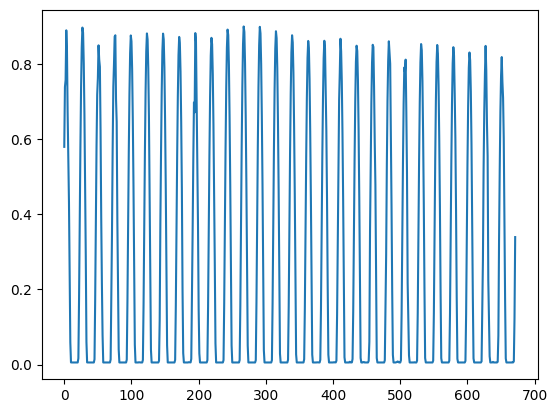

In [42]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 6 input-signals.
seq = x_batch[batch, :, signal]
plt.style.use('default')
plt.grid(False)
plt.plot(seq)

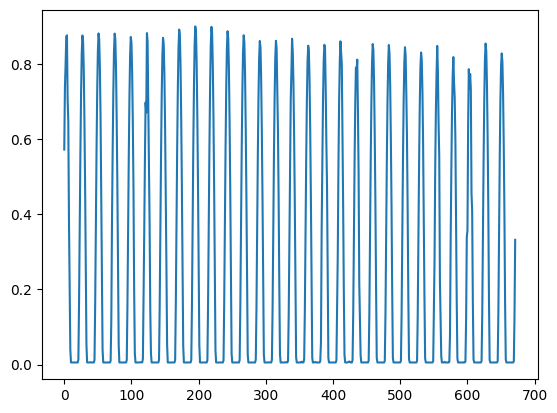

In [43]:
seq = y_batch[batch, :, signal]
plt.style.use('default')
plt.grid(False)
plt.plot(seq)

Validation Set

In [44]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

validation_data

(array([[[6.05968842e-01, 7.96002955e-01, 3.32620940e-01, 2.56552026e-03,
          7.26458132e-01, 5.65217391e-01],
         [5.19159571e-01, 7.66705810e-01, 3.50838025e-01, 2.29081937e-03,
          7.31889887e-01, 6.08695652e-01],
         [3.85510196e-01, 7.09860795e-01, 2.68445076e-01, 2.05827279e-03,
          7.33352474e-01, 6.52173913e-01],
         ...,
         [5.39431645e-03, 4.30062714e-03, 2.54195965e-01, 1.02303472e-03,
          4.33554259e-01, 8.26086957e-01],
         [5.39431645e-03, 4.30062714e-03, 3.75327006e-01, 6.02278711e-04,
          3.56930873e-01, 8.69565217e-01],
         [5.39431645e-03, 4.30062714e-03, 3.41351911e-01, 6.53857862e-04,
          3.12939813e-01, 9.13043478e-01]]]),
 array([[[0.59496402],
         [0.52571551],
         [0.39173698],
         ...,
         [0.00539432],
         [0.00539432],
         [0.00539432]]]))

Create the model: Dilated Causal convolution NN

In [45]:
import tensorflow as tf
import os

In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Lambda, concatenate
from tensorflow.keras.optimizers import Adam

In [47]:
tf.__version__

'2.12.0'

In [48]:
# Keras Sequential definition -- var model2

#num_x_signals=6
#p = "valid" 
p='causal' # this only works in 1.12+ -- December 2018+

model2 = Sequential([
    #Conv1D(filters=n_filters, kernel_size=filter_width, padding='causal', dilation_rate=1),
    # padding= One of "valid" or "same"
    #Input(shape=(None, 1)), 
    #Input(shape=(None, num_x_signals)), This is not for Sequential
    Conv1D(filters=32, input_shape=( None, num_x_signals ), 
           kernel_size=2, padding='causal', dilation_rate=1),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=2),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=4),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=8),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=16),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=32),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=64),
    Conv1D(filters=32, kernel_size=2, padding=p, dilation_rate=128),
    Dense(128, activation=tf.nn.relu), #model.add(Dense(num_y_signals, activation="tanh"))   #'sigmoid'))
    Dropout(.2),
    Dense(1, activation="tanh") 
    #Dense(1),
    
])

#optimizer = tf.train.RMSPropOptimizer(0.001)

model2.compile(Adam(), loss='mean_absolute_error')



In [49]:
# Keras model definition using the Functional API -- var name "model"

# in [3] they use functional definition of the NN
# convolutional layer parameters
n_filters = 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] 

# define an input history series and pass it through a stack of dilated causal convolutions. 
history_seq = Input(shape=(None, num_x_signals))
x = history_seq

for dilation_rate in dilation_rates:
    x = Conv1D(filters=n_filters,
               kernel_size=filter_width, 
               padding='causal',
               dilation_rate=dilation_rate)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(1)(x)

# extract the last 14 time steps as the training target
#def slice(x, seq_length):
#    return x[:,-seq_length:,:]
# I don't need this in here, it [3] they do the shift here, w/TF Lambda 

#pred_seq_train = Lambda(slice, arguments={'seq_length':sequence_length})(x)

#model = Model(history_seq, pred_seq_train)
model = Model(history_seq, x)

# help on Keras functional API: https://www.tensorflow.org/guide/keras#functional_api
#model = tf.keras.Model(inputs=inputs, outputs=predictions

Compile Model

In [50]:
model.compile(Adam(), loss='mean_absolute_error')
#model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [51]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          416       
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_3 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_4 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_5 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          2

In [52]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 6)]         0         
                                                                 
 conv1d_8 (Conv1D)           (None, None, 32)          416       
                                                                 
 conv1d_9 (Conv1D)           (None, None, 32)          2080      
                                                                 
 conv1d_10 (Conv1D)          (None, None, 32)          2080      
                                                                 
 conv1d_11 (Conv1D)          (None, None, 32)          2080      
                                                                 
 conv1d_12 (Conv1D)          (None, None, 32)          2080      
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          2080  

Train the Recurrnet Neural Network 

In [53]:
%%time
history2 = model2.fit_generator(generator=generator,
                    epochs=20, # ideally should be 10
                    steps_per_epoch=2, #ideally should be 100
                    validation_data=validation_data)
                    #, callbacks=callbacks)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
2/2 [==============================] - 44s 20s/step - loss: 0.2414 - val_loss: 0.1214
Epoch 2/20
2/2 [==============================] - 43s 20s/step - loss: 0.1655 - val_loss: 0.0859
Epoch 3/20
2/2 [==============================] - 56s 25s/step - loss: 0.1401 - val_loss: 0.0755
Epoch 4/20
2/2 [==============================] - 40s 21s/step - loss: 0.1243 - val_loss: 0.0814
Epoch 5/20
2/2 [==============================] - 41s 22s/step - loss: 0.1202 - val_loss: 0.0720
Epoch 6/20
2/2 [==============================] - 41s 20s/step - loss: 0.1135 - val_loss: 0.0723
Epoch 7/20
2/2 [==============================] - 41s 20s/step - loss: 0.1080 - val_loss: 0.0670
Epoch 8/20
2/2 [==============================] - 41s 21s/step - loss: 0.1001 - val_loss: 0.0671
Epoch 9/20
2/2 [==============================] - 40s 21s/step - loss: 0.0951 - val_loss: 0.0624
Epoch 10/20
2/2 [==============================] - 39s 19s/step - loss: 0.0907 - val_loss: 0.0603
Epoch 11/20
2/2 [============

In [54]:
%%time
history = model.fit_generator(generator=generator,
                    epochs=20, # ideally should be 10
                    steps_per_epoch=2, # ideally should be 100
                    validation_data=validation_data)
#                    callbacks=callbacks)
# no callbacks here

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
2/2 [==============================] - 44s 22s/step - loss: 0.2423 - val_loss: 0.1205
Epoch 2/20
2/2 [==============================] - 40s 20s/step - loss: 0.1754 - val_loss: 0.0924
Epoch 3/20
2/2 [==============================] - 40s 19s/step - loss: 0.1421 - val_loss: 0.1003
Epoch 4/20
2/2 [==============================] - 41s 20s/step - loss: 0.1270 - val_loss: 0.0900
Epoch 5/20
2/2 [==============================] - 41s 21s/step - loss: 0.1178 - val_loss: 0.0665
Epoch 6/20
2/2 [==============================] - 40s 20s/step - loss: 0.1122 - val_loss: 0.0685
Epoch 7/20
2/2 [==============================] - 51s 30s/step - loss: 0.1064 - val_loss: 0.0707
Epoch 8/20
2/2 [==============================] - 40s 21s/step - loss: 0.1017 - val_loss: 0.0693
Epoch 9/20
2/2 [==============================] - 39s 20s/step - loss: 0.0975 - val_loss: 0.0588
Epoch 10/20
2/2 [==============================] - 41s 20s/step - loss: 0.0930 - val_loss: 0.0523
Epoch 11/20
2/2 [============

In [55]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Restore the weights
# model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

model.save('DCCNN_model.h5')

In [56]:
model2.save('DCCNN_model2.h5')

Performance on the test-set

In [57]:
result = model2.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 33ms/step - loss: 0.0416


In [58]:
print("loss (test-set):", result)

loss (test-set): 0.041562046855688095


In [59]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 36ms/step - loss: 0.0433


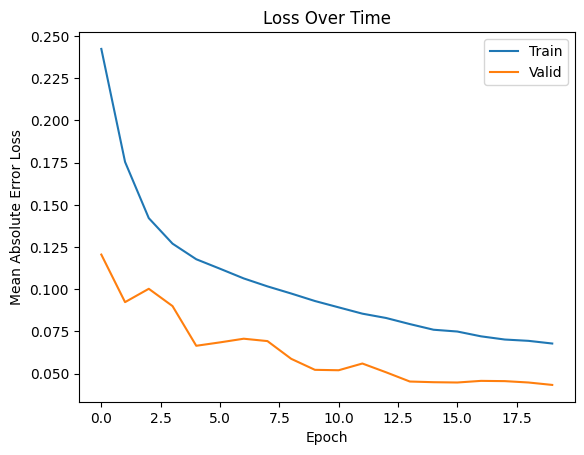

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.style.use('default')
plt.grid(False)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss') #?!
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

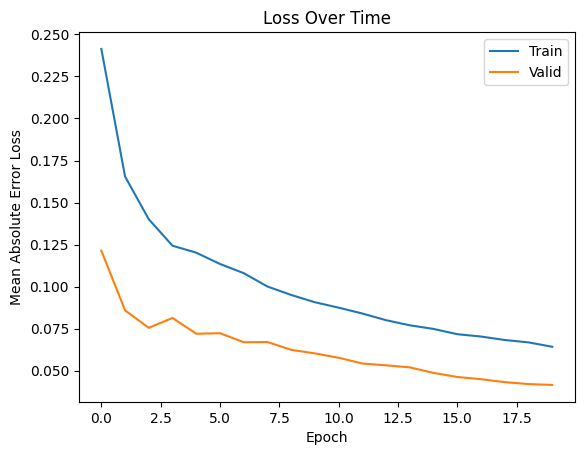

In [61]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.style.use('default')
plt.grid(False)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss') #?!
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

Generate Predictions

In [62]:
warmup_steps=50

In [63]:
# true vs predicted plot function borrowed from [2]
# also scales back to the original (temperature)
target_names = ['GHI_AVG','hour']
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        from sklearn.metrics import r2_score
        print("R2:",r2_score(signal_true,signal_pred))

        from sklearn.metrics import mean_squared_error
        from math import sqrt
        #calculate RMSE 
        print("RMSE: ",sqrt(mean_squared_error(signal_true,signal_pred)))
        
        from sklearn.metrics import mean_absolute_error
        # calculate MAE
        print("MAE:",mean_absolute_error(signal_true,signal_pred))

        from sklearn.metrics import mean_absolute_percentage_error
        # calculate MAPE/MAPD(mean absolute precentaeg deviation)
        print("MAPD",mean_absolute_percentage_error(signal_true,signal_pred))

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        # p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.style.use('default')
        plt.grid(False)
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

1/1 [==============================] - 0s 334ms/step
R2: 0.8528098254690935
RMSE:  0.08743471981726784
MAE: 0.04819767553916983
MAPD 2.0588935413144394


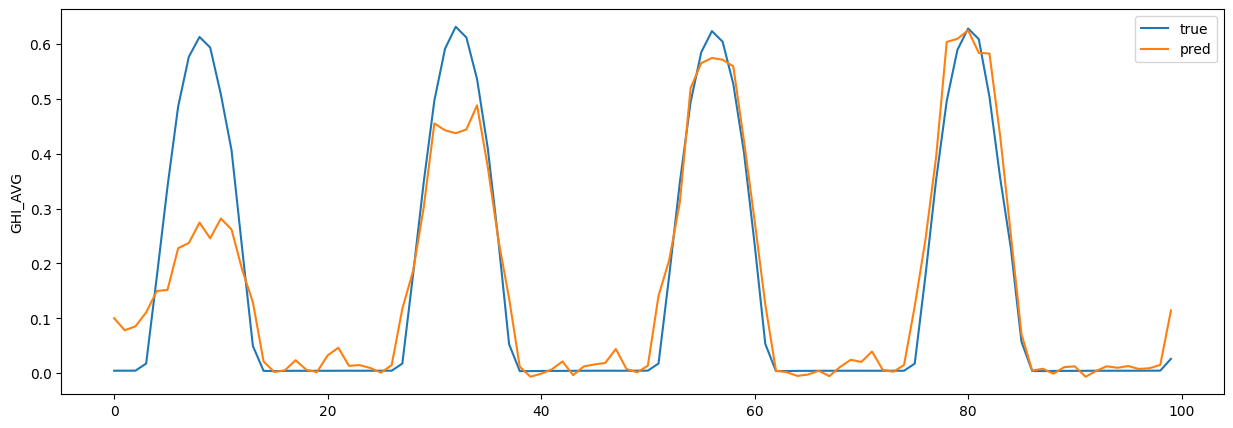

IndexError: ignored

In [64]:
plot_comparison(start_idx=100, length=100, train=True)

In [65]:
# true vs predicted plot function borrowed from [2]
# also scales back to the original (temperature)
target_names = ['GHI_AVG','hour']
def plot_comparison2(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model2.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        from sklearn.metrics import r2_score
        print("R2:",r2_score(signal_true,signal_pred))

        from sklearn.metrics import mean_squared_error
        from math import sqrt
        #calculate RMSE 
        print("RMSE: ",sqrt(mean_squared_error(signal_true,signal_pred)))
        
        from sklearn.metrics import mean_absolute_error
        # calculate MAE
        print("MAE:",mean_absolute_error(signal_true,signal_pred))

        from sklearn.metrics import mean_absolute_percentage_error
        # calculate MAPE/MAPD(mean absolute precentaeg deviation)
        print("MAPD",mean_absolute_percentage_error(signal_true,signal_pred))

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        # p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.style.use('default')
        plt.grid(False)
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

1/1 [==============================] - 0s 306ms/step
R2: 0.9020686235029649
RMSE:  0.07131903233677445
MAE: 0.04165109473611699
MAPD 1.6936773846025033


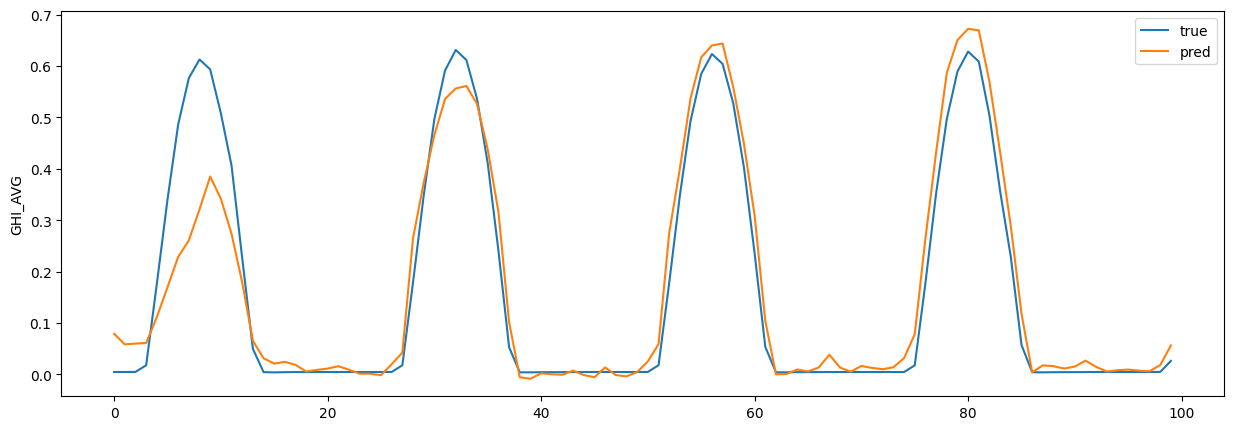

IndexError: ignored

In [66]:
plot_comparison2(start_idx=100, length=100, train=True)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(signla_true,sugnal_pred))


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE 
print(sqrt(mean_squared_error(conc[-168:],pred)))

In [ ]:
from sklearn.metrics import mean_absolute_error

# calculate MAE
print(mean_absolute_error(conc[-168:],pred))

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
# calculate MAPE/MAPD(mean absolute precentaeg deviation)
print(mean_absolute_percentage_error(csignal_true,signal_pred))